In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # Corrected import
import seaborn as sns

# If using Jupyter Notebook:
%matplotlib inline  

In [3]:
# import the data set
df=pd.read_csv("Electric_Vehicle_Population_Data.csv")
# display the data set
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,1C4JJXP66P,Kitsap,Poulsbo,WA,98370.0,2023,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,0.0,23.0,258127145,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
1,1G1FX6S08K,Snohomish,Lake Stevens,WA,98258.0,2019,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238.0,0.0,44.0,4735426,POINT (-122.06402 48.01497),PUGET SOUND ENERGY INC,5.306105e+10
2,WBY1Z2C58F,King,Seattle,WA,98116.0,2015,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,81.0,0.0,34.0,272697666,POINT (-122.41067 47.57894),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJ3E1EBXK,King,Seattle,WA,98178.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,37.0,477309682,POINT (-122.23825 47.49461),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1V24F,Yakima,Selah,WA,98942.0,2015,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208.0,0.0,15.0,258112970,POINT (-120.53145 46.65405),PACIFICORP,5.307700e+10


In [4]:
# infermation of the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223995 entries, 0 to 223994
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         223995 non-null  object 
 1   County                                             223992 non-null  object 
 2   City                                               223992 non-null  object 
 3   State                                              223995 non-null  object 
 4   Postal Code                                        223992 non-null  float64
 5   Model Year                                         223995 non-null  int64  
 6   Make                                               223995 non-null  object 
 7   Model                                              223995 non-null  object 
 8   Electric Vehicle Type                              223995 non-null  object

In [5]:
# columns of the data set
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [6]:
#find the missing values of the data set
df.isna().sum().sort_values(ascending=False)


Legislative District                                 474
Electric Range                                        18
Base MSRP                                             18
Vehicle Location                                      10
2020 Census Tract                                      3
City                                                   3
Electric Utility                                       3
Postal Code                                            3
County                                                 3
DOL Vehicle ID                                         0
VIN (1-10)                                             0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Model                                                  0
Make                                                   0
Model Year                                             0
State                                                  0
Electric Vehicle Type                                  0
dtype: int64

In [7]:
# shape of the dataset
df.shape

(223995, 17)

In [8]:
# find any duplicate values
df.duplicated().sum()

0

In [9]:
# drop missing values
df = df.dropna()

In [10]:
#count unique values in the data set
df.nunique()

VIN (1-10)                                            13154
County                                                   39
City                                                    484
State                                                     1
Postal Code                                             565
Model Year                                               21
Make                                                     46
Model                                                   164
Electric Vehicle Type                                     2
Clean Alternative Fuel Vehicle (CAFV) Eligibility         3
Electric Range                                          109
Base MSRP                                                31
Legislative District                                     49
DOL Vehicle ID                                       223496
Vehicle Location                                        564
Electric Utility                                         75
2020 Census Tract                       

In [11]:
# discribtion of the dataset
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,223496.000000,223496.000000,223496.000000,223496.000000,223496.000000,2.234960e+05,2.234960e+05
mean,98269.193739,2021.265266,47.726599,828.337957,28.876356,2.329479e+08,5.304006e+10
std,310.659079,2.989873,84.975652,7366.061719,14.911001,6.884834e+07,1.644383e+07
min,98001.000000,1999.000000,0.000000,0.000000,1.000000,4.385000e+03,5.300195e+10
25%,98052.000000,2020.000000,0.000000,0.000000,17.000000,2.008299e+08,5.303301e+10
50%,98126.000000,2022.000000,0.000000,0.000000,32.000000,2.488410e+08,5.303303e+10
75%,98375.000000,2023.000000,39.000000,0.000000,42.000000,2.674022e+08,5.305307e+10
max,99403.000000,2025.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.307794e+10


In [12]:
# find numerical features and catogarical features
numeric_feature = []
catogrical_feature = []

for feature in df.columns:
    if df[feature].dtype == 'object':
        catogrical_feature.append(feature)
    else: 
        numeric_feature.append(feature)

# Print the final lists outside the loop
print(f"The Categorical features are: {catogrical_feature}")
print(f"The Numerical features are: {numeric_feature}")


The Categorical features are: ['VIN (1-10)', 'County', 'City', 'State', 'Make', 'Model', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Vehicle Location', 'Electric Utility']
The Numerical features are: ['Postal Code', 'Model Year', 'Electric Range', 'Base MSRP', 'Legislative District', 'DOL Vehicle ID', '2020 Census Tract']


In [ ]:
# any missing values
df.isna().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

C:\Users\MUHAMMED SUNAIN\AppData\Local\Temp\ipykernel_1452\211834859.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='County', y='Count', data=county_counts, palette='viridis')


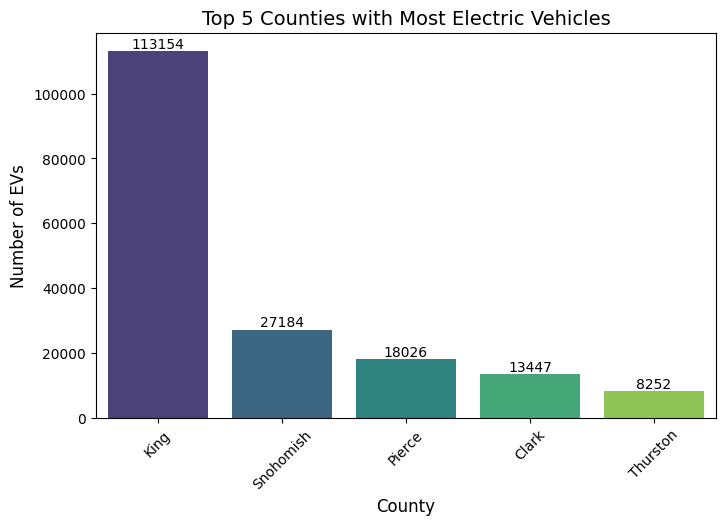

In [36]:
# How many electric vehicles (EVs) are in each county?


# Count EVs per county and convert to DataFrame
county_counts = df['County'].value_counts().head().reset_index()
county_counts.columns = ['County', 'Count']  # Rename columns

# Plot using Seaborn
plt.figure(figsize=(8, 5))
ax = sns.barplot(x='County', y='Count', data=county_counts, palette='viridis')

# Add labels on the bars
ax.bar_label(ax.containers[0]) 
ax.bar_label(ax.containers[1]) 
ax.bar_label(ax.containers[2]) 
ax.bar_label(ax.containers[3]) 
ax.bar_label(ax.containers[4]) 

# Add title and labels
plt.title("Top 5 Counties with Most Electric Vehicles", fontsize=14)
plt.xlabel("County", fontsize=12)
plt.ylabel("Number of EVs", fontsize=12)
plt.xticks(rotation=45)  # Rotate labels for better visibility
plt.show()


C:\Users\MUHAMMED SUNAIN\AppData\Local\Temp\ipykernel_1452\4261009604.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Make', y='Count', data=brands,palette='viridis')


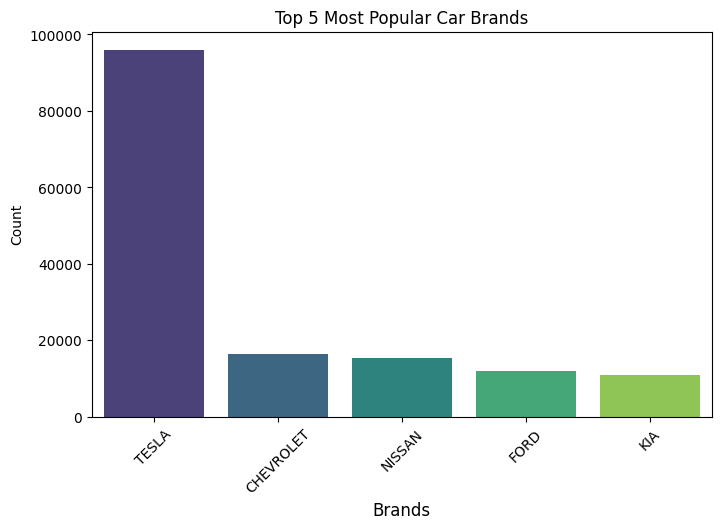

In [51]:
# Which car brands are most popular?

# Get the top 5 most common car brands
brands = df['Make'].value_counts().head().reset_index()
brands.columns = ['Make', 'Count']  # Rename columns for clarity

# Create bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Make', y='Count', data=brands,palette='viridis')


# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.title("Top 5 Most Popular Car Brands")
plt.xlabel('Brands', fontsize=12)
plt.show()


In [37]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,1C4JJXP66P,Kitsap,Poulsbo,WA,98370.0,2023,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,0.0,23.0,258127145,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
1,1G1FX6S08K,Snohomish,Lake Stevens,WA,98258.0,2019,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238.0,0.0,44.0,4735426,POINT (-122.06402 48.01497),PUGET SOUND ENERGY INC,5.306105e+10
2,WBY1Z2C58F,King,Seattle,WA,98116.0,2015,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,81.0,0.0,34.0,272697666,POINT (-122.41067 47.57894),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJ3E1EBXK,King,Seattle,WA,98178.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,37.0,477309682,POINT (-122.23825 47.49461),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1V24F,Yakima,Selah,WA,98942.0,2015,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208.0,0.0,15.0,258112970,POINT (-120.53145 46.65405),PACIFICORP,5.307700e+10
